In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn import tree
from graphviz import Digraph
from sklearn.metrics import roc_curve, auc

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

%matplotlib inline
from pandas import DataFrame
from sklearn import metrics

/Users/Singsing/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('finaltext.csv')

In [3]:
columns = list(df)

In [5]:
columns.remove('company')

ValueError: list.remove(x): x not in list

In [6]:
columns.remove('suspend')

In [7]:
columns.remove('symbol')

In [8]:
X = df[columns]
Y = df.suspend
Y = np.ravel(Y)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print len(X_train), len(Y_train), len(X_test), len(Y_test)

181 181 78 78


In [10]:
log_reg = LogisticRegression()
rand_for = RandomForestClassifier()
dec_tree = DecisionTreeClassifier()
bag_class = BaggingClassifier()
naive_bay = GaussianNB()
k_near_n = KNeighborsClassifier()

logistic regression

In [11]:
log_reg_RFE = RFE(log_reg, 6)
log_reg_RFE.fit(X_train[['Concept_risks', 'Concept_impact', 'Concept_available', 'Concept_director','Concept_funds','Concept_commonstock']], Y_train)

log_reg_RFE_df = pd.DataFrame()

log_reg_RFE_df['Rank'] = log_reg_RFE.ranking_
log_reg_RFE_df['Feature'] = X_train[['Concept_risks', 'Concept_impact', 'Concept_available', 'Concept_director','Concept_funds','Concept_commonstock']].columns
log_reg_RFE_df['Support'] = log_reg_RFE.support_
log_reg_RFE_df[log_reg_RFE_df.Support == True]


,Rank,Feature,Support
0,1,Concept_risks,True
1,1,Concept_impact,True
2,1,Concept_available,True
3,1,Concept_director,True
4,1,Concept_funds,True
5,1,Concept_commonstock,True


In [12]:
log_reg_RFE.score(X_test[['Concept_risks', 'Concept_impact', 'Concept_available', 'Concept_director','Concept_funds','Concept_commonstock']], Y_test)

0.71794871794871795

In [13]:
print 'Logistic Regression model accuracy: ' + str(log_reg_RFE.score(X_test[['Concept_risks', 'Concept_impact', 'Concept_available', 'Concept_director','Concept_funds','Concept_commonstock']], Y_test))

Logistic Regression model accuracy: 0.717948717949


In [14]:
log_reg_export = pd.DataFrame(log_reg_RFE.predict_proba(X[['Concept_risks', 'Concept_impact', 'Concept_available', 'Concept_director','Concept_funds','Concept_commonstock']]))
log_reg_export['company'] = df.company
log_reg_export['symbol'] = df.symbol
log_reg_export['suspend'] = df.suspend
log_reg_export

,0,1,company,symbol,suspend
0,0.078816,0.921184,OXiGENE,OXGN,1
1,0.369624,0.630376,PendrellCorporation,PCO,1
2,0.653484,0.346516,PhotoMedex,PHMD,1
3,0.474897,0.525103,PrimaBioMedLtd,PBMD,1
4,0.184911,0.815089,PrismTechnologiesGroup,PRZM,1
5,0.037095,0.962905,ProfessionalDiversityNetwork,IPDN,1
6,0.168358,0.831642,QKLStores,QKLS,1
7,0.438309,0.561691,QualstarCorporation,QBAK,1
8,0.313369,0.686631,QuestResourceHoldingCorporation,QRHC,1
9,0.491383,0.508617,RadaElectronicsIndustriesLimited,RADA,1


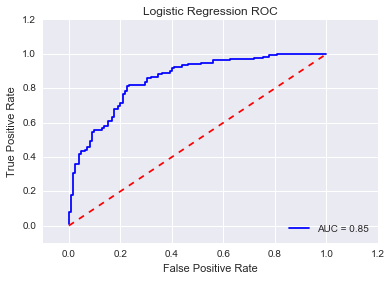

In [27]:
actual = log_reg_export.suspend
pred = log_reg_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Logistic Regression ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision Tree

In [16]:
dec_tree_RFE = RFE(dec_tree, 6)
dec_tree_RFE.fit(X_train[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']], Y_train)

dec_tree_RFE_df = pd.DataFrame()

dec_tree_RFE_df['Rank'] = dec_tree_RFE.ranking_
dec_tree_RFE_df['Feature'] = X_train[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']].columns
dec_tree_RFE_df['Support'] = dec_tree_RFE.support_
dec_tree_RFE_df[dec_tree_RFE_df.Support == True]

,Rank,Feature,Support
0,1,Concept_impact,True
1,1,Concept_declined,True
2,1,Concept_cash,True
3,1,Concept_fda,True
4,1,Concept_research,True
5,1,Concept_notes,True


In [17]:
print 'Decision Tree model accuracy: ' + str(dec_tree_RFE.score(X_test[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']], Y_test))

Decision Tree model accuracy: 0.628205128205


In [18]:
log_dec_export = pd.DataFrame(dec_tree_RFE.predict_proba(X[['Concept_risks', 'Concept_impact', 'Concept_available', 'Concept_director','Concept_funds','Concept_commonstock']]))
log_dec_export['company'] = df.company
log_dec_export['symbol'] = df.symbol
log_dec_export['suspend'] = df.suspend
log_dec_export

,0,1,company,symbol,suspend
0,0,1,OXiGENE,OXGN,1
1,0,1,PendrellCorporation,PCO,1
2,0,1,PhotoMedex,PHMD,1
3,1,0,PrimaBioMedLtd,PBMD,1
4,1,0,PrismTechnologiesGroup,PRZM,1
5,1,0,ProfessionalDiversityNetwork,IPDN,1
6,0,1,QKLStores,QKLS,1
7,1,0,QualstarCorporation,QBAK,1
8,0,1,QuestResourceHoldingCorporation,QRHC,1
9,0,1,RadaElectronicsIndustriesLimited,RADA,1


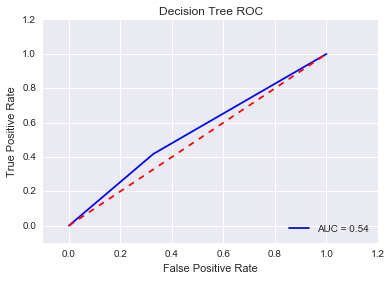

In [28]:
actual = log_dec_export.suspend
pred = log_dec_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Decision Tree ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Naive Bayes

In [20]:
naive_bay.fit(X_train[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']],Y_train)

print 'Naive Baye model accuracy: ' + str(naive_bay.score(X_test[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']], Y_test))

Naive Baye model accuracy: 0.628205128205


In [21]:
log_naive_export = pd.DataFrame(naive_bay.predict_proba(X[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']]))
log_naive_export['company'] = df.company
log_naive_export['symbol'] = df.symbol
log_naive_export['suspend'] = df.suspend
log_naive_export

,0,1,company,symbol,suspend
0,3.650697e-02,0.963493,OXiGENE,OXGN,1
1,1.239074e-01,0.876093,PendrellCorporation,PCO,1
2,5.935288e-01,0.406471,PhotoMedex,PHMD,1
3,1.228478e-01,0.877152,PrimaBioMedLtd,PBMD,1
4,2.400862e-01,0.759914,PrismTechnologiesGroup,PRZM,1
5,2.384021e-01,0.761598,ProfessionalDiversityNetwork,IPDN,1
6,1.979882e-01,0.802012,QKLStores,QKLS,1
7,1.947076e-01,0.805292,QualstarCorporation,QBAK,1
8,2.084067e-01,0.791593,QuestResourceHoldingCorporation,QRHC,1
9,1.995892e-01,0.800411,RadaElectronicsIndustriesLimited,RADA,1


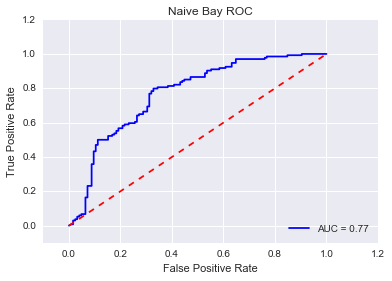

In [29]:
actual = log_naive_export.suspend
pred = log_naive_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Naive Bay ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

K-NN

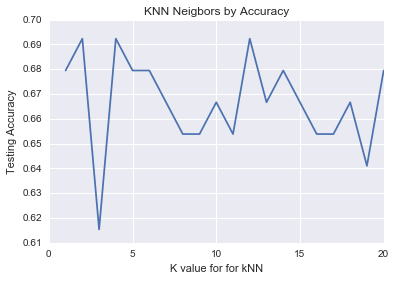

In [23]:
# Test k values 1 through 20
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    k_near_n = KNeighborsClassifier(n_neighbors= k)
    k_near_n.fit(X_train[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']], Y_train)
    Y_pred = k_near_n.predict(X_test[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']])
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

plt.title('KNN Neigbors by Accuracy')
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

In [24]:
k_near_n = KNeighborsClassifier(n_neighbors= 12)
k_near_n.fit(X_train[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']], Y_train)
print 'KNN model accuracy: ' + str(k_near_n.score(X_test[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']], Y_test))

KNN model accuracy: 0.692307692308


In [25]:
log_knn_export = pd.DataFrame(k_near_n.predict_proba(X[['Concept_risks', 'Concept_impact', 'Concept_available', 'Concept_director','Concept_funds','Concept_commonstock']]))
log_knn_export['company'] = df.company
log_knn_export['symbol'] = df.symbol
log_knn_export['suspend'] = df.suspend
log_knn_export

,0,1,company,symbol,suspend
0,0.333333,0.666667,OXiGENE,OXGN,1
1,0.083333,0.916667,PendrellCorporation,PCO,1
2,0.750000,0.250000,PhotoMedex,PHMD,1
3,0.583333,0.416667,PrimaBioMedLtd,PBMD,1
4,0.250000,0.750000,PrismTechnologiesGroup,PRZM,1
5,0.583333,0.416667,ProfessionalDiversityNetwork,IPDN,1
6,0.250000,0.750000,QKLStores,QKLS,1
7,0.333333,0.666667,QualstarCorporation,QBAK,1
8,0.250000,0.750000,QuestResourceHoldingCorporation,QRHC,1
9,0.333333,0.666667,RadaElectronicsIndustriesLimited,RADA,1


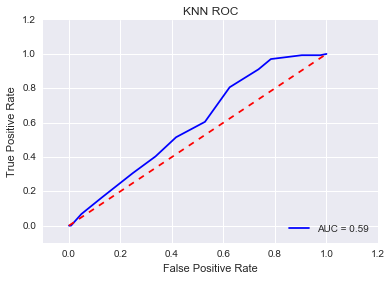

In [30]:
actual = log_knn_export.suspend
pred = log_knn_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('KNN ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [33]:
rand_for.fit(X_train[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']], Y_train)

rand_for_df = pd.DataFrame()

rand_for_df['Feature'] = X_train[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']].columns
rand_for_df['Rank'] = rand_for.feature_importances_
rand_for_df.sort_values('Rank', inplace= True)

In [34]:
print 'Random forest model accuracy: ' + str(rand_for.score(X_test[['Concept_impact','Concept_declined','Concept_cash','Concept_fda','Concept_research','Concept_notes']], Y_test))

Random forest model accuracy: 0.692307692308


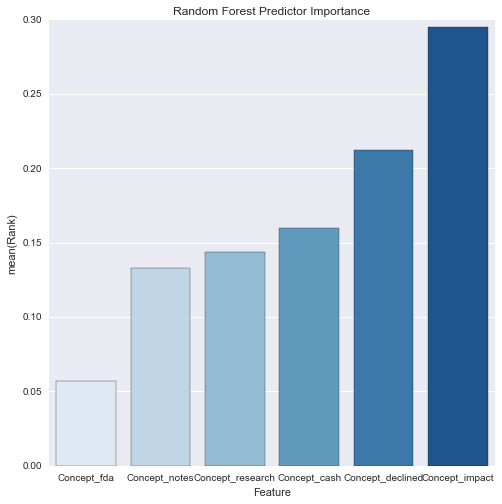

In [35]:
plt.figure(figsize=(8,8))
plt.title('Random Forest Predictor Importance')
sns.barplot(x= 'Feature', y = 'Rank', data = rand_for_df, palette= 'Blues')

In [36]:
log_rf_export = pd.DataFrame(rand_for.predict_proba(X[['Concept_risks', 'Concept_impact', 'Concept_available', 'Concept_director','Concept_funds','Concept_commonstock']]))
log_rf_export['company'] = df.company
log_rf_export['symbol'] = df.symbol
log_rf_export['suspend'] = df.suspend
log_rf_export

,0,1,company,symbol,suspend
0,0.1,0.9,OXiGENE,OXGN,1
1,0.3,0.7,PendrellCorporation,PCO,1
2,0.5,0.5,PhotoMedex,PHMD,1
3,0.4,0.6,PrimaBioMedLtd,PBMD,1
4,0.4,0.6,PrismTechnologiesGroup,PRZM,1
5,0.4,0.6,ProfessionalDiversityNetwork,IPDN,1
6,0.4,0.6,QKLStores,QKLS,1
7,0.3,0.7,QualstarCorporation,QBAK,1
8,0.4,0.6,QuestResourceHoldingCorporation,QRHC,1
9,0.1,0.9,RadaElectronicsIndustriesLimited,RADA,1


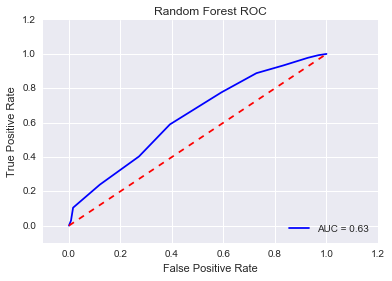

In [37]:
actual = log_rf_export.suspend
pred = log_rf_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Random Forest ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Bagging Classifier

In [38]:
bag_class_RFE = RFE(dec_tree, 6)
bag_class_RFE.fit(X_train, Y_train)

bag_class_RFE_df = pd.DataFrame()

bag_class_RFE_df['Rank'] = bag_class_RFE.ranking_
bag_class_RFE_df['Feature'] = X_train.columns
bag_class_RFE_df['Support'] = bag_class_RFE.support_
bag_class_RFE_df[bag_class_RFE_df.Support == True]

,Rank,Feature,Support
2,1,Concept_risks,True
8,1,Concept_impact,True
21,1,Concept_patents,True
33,1,Concept_funds,True
65,1,Concept_agreement,True
71,1,Concept_commonstock,True


In [39]:
print 'Bagging Cassifier accuracy: ' + str(bag_class_RFE.score(X_test, Y_test))

Bagging Cassifier accuracy: 0.653846153846


In [40]:
log_bg_export = pd.DataFrame(bag_class_RFE.predict_proba(X))
log_bg_export['company'] = df.company
log_bg_export['symbol'] = df.symbol
log_bg_export['suspend'] = df.suspend
log_bg_export

,0,1,company,symbol,suspend
0,0,1,OXiGENE,OXGN,1
1,0,1,PendrellCorporation,PCO,1
2,1,0,PhotoMedex,PHMD,1
3,0,1,PrimaBioMedLtd,PBMD,1
4,0,1,PrismTechnologiesGroup,PRZM,1
5,0,1,ProfessionalDiversityNetwork,IPDN,1
6,0,1,QKLStores,QKLS,1
7,0,1,QualstarCorporation,QBAK,1
8,0,1,QuestResourceHoldingCorporation,QRHC,1
9,0,1,RadaElectronicsIndustriesLimited,RADA,1


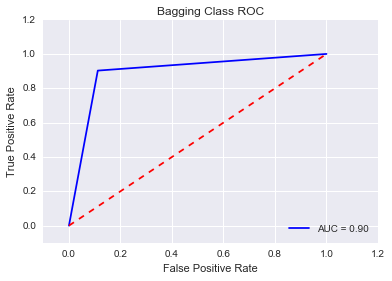

In [42]:
actual = log_bg_export.suspend
pred = log_bg_export[1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Bagging Class ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()